<a href="https://colab.research.google.com/github/mzannierich/mzannierich/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/My Drive/Datasets/fraud_oracle.csv'
fraud_oracle = pd.read_csv(path)

In [4]:
print(fraud_oracle)

      Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  .

In [5]:
#To remove irrelevant variables
fraud_oracle = fraud_oracle.drop(['WeekOfMonth', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber', 'AgentType', 'Year', 'NumberOfSuppliments'], axis = 1)

In [6]:
fraud_oracle.head()

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,Wednesday,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport - Liability,...,more than 30,none,3 years,26 to 30,No,No,1 year,3 to 4,1994,Liability
1,Jan,Wednesday,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport - Collision,...,more than 30,none,6 years,31 to 35,Yes,No,no change,1 vehicle,1994,Collision
2,Oct,Friday,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport - Collision,...,more than 30,1,7 years,41 to 50,No,No,no change,1 vehicle,1994,Collision
3,Jun,Saturday,Toyota,Rural,Jul,Male,Married,65,Third Party,Sedan - Liability,...,more than 30,1,more than 7,51 to 65,Yes,No,no change,1 vehicle,1994,Liability
4,Jan,Monday,Honda,Urban,Feb,Female,Single,27,Third Party,Sport - Collision,...,more than 30,none,5 years,31 to 35,No,No,no change,1 vehicle,1994,Collision


In [6]:
# To check for missing values
fraud_oracle.isna().sum()

Month                   0
DayOfWeek               0
Make                    0
AccidentArea            0
MonthClaimed            0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
# Transforming vehicle price variable into ordinal numbers
fraud_oracle = fraud_oracle.replace({'VehiclePrice':{'less than 20000' : 1, '20000 to 29000' : 2, '30000 to 39000' : 3, '40000 to 59000' : 4, '60000 to 69000' : 5, 'more than 69000' : 6}})

In [10]:
fraud_oracle.head()

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,Wednesday,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport - Liability,...,more than 30,none,3 years,26 to 30,No,No,1 year,3 to 4,1994,Liability
1,Jan,Wednesday,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport - Collision,...,more than 30,none,6 years,31 to 35,Yes,No,no change,1 vehicle,1994,Collision
2,Oct,Friday,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport - Collision,...,more than 30,1,7 years,41 to 50,No,No,no change,1 vehicle,1994,Collision
3,Jun,Saturday,Toyota,Rural,Jul,Male,Married,65,Third Party,Sedan - Liability,...,more than 30,1,more than 7,51 to 65,Yes,No,no change,1 vehicle,1994,Liability
4,Jan,Monday,Honda,Urban,Feb,Female,Single,27,Third Party,Sport - Collision,...,more than 30,none,5 years,31 to 35,No,No,no change,1 vehicle,1994,Collision


In [8]:
pd.pandas.set_option('display.max_columns', None)

In [9]:
fraud_oracle.head()

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,Wednesday,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport - Liability,Sport,6,0,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,1 year,3 to 4,1994,Liability
1,Jan,Wednesday,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport - Collision,Sport,6,0,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,no change,1 vehicle,1994,Collision
2,Oct,Friday,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport - Collision,Sport,6,0,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,no change,1 vehicle,1994,Collision
3,Jun,Saturday,Toyota,Rural,Jul,Male,Married,65,Third Party,Sedan - Liability,Sport,2,0,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,no change,1 vehicle,1994,Liability
4,Jan,Monday,Honda,Urban,Feb,Female,Single,27,Third Party,Sport - Collision,Sport,6,0,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,no change,1 vehicle,1994,Collision


In [10]:
# Transforming past number of claims variable into ordinal numbers
fraud_oracle = fraud_oracle.replace({'PastNumberOfClaims':{'none' : 1, '1' : 2, '2 to 4' : 3, 'more than 4' : 4}})

In [11]:
fraud_oracle.head()

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,Wednesday,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport - Liability,Sport,6,0,300,1,more than 30,more than 30,1,3 years,26 to 30,No,No,1 year,3 to 4,1994,Liability
1,Jan,Wednesday,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport - Collision,Sport,6,0,400,4,more than 30,more than 30,1,6 years,31 to 35,Yes,No,no change,1 vehicle,1994,Collision
2,Oct,Friday,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport - Collision,Sport,6,0,400,3,more than 30,more than 30,2,7 years,41 to 50,No,No,no change,1 vehicle,1994,Collision
3,Jun,Saturday,Toyota,Rural,Jul,Male,Married,65,Third Party,Sedan - Liability,Sport,2,0,400,2,more than 30,more than 30,2,more than 7,51 to 65,Yes,No,no change,1 vehicle,1994,Liability
4,Jan,Monday,Honda,Urban,Feb,Female,Single,27,Third Party,Sport - Collision,Sport,6,0,400,1,more than 30,more than 30,1,5 years,31 to 35,No,No,no change,1 vehicle,1994,Collision


In [12]:
# Transforming past number of claims variable into ordinal numbers
fraud_oracle = fraud_oracle.replace({'PastNumberOfClaims':{'none' : 1, '1' : 2, '2 to 4' : 3, 'more than 4' : 4}})

In [13]:
fraud_oracle.head()

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,Wednesday,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport - Liability,Sport,6,0,300,1,more than 30,more than 30,1,3 years,26 to 30,No,No,1 year,3 to 4,1994,Liability
1,Jan,Wednesday,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport - Collision,Sport,6,0,400,4,more than 30,more than 30,1,6 years,31 to 35,Yes,No,no change,1 vehicle,1994,Collision
2,Oct,Friday,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport - Collision,Sport,6,0,400,3,more than 30,more than 30,2,7 years,41 to 50,No,No,no change,1 vehicle,1994,Collision
3,Jun,Saturday,Toyota,Rural,Jul,Male,Married,65,Third Party,Sedan - Liability,Sport,2,0,400,2,more than 30,more than 30,2,more than 7,51 to 65,Yes,No,no change,1 vehicle,1994,Liability
4,Jan,Monday,Honda,Urban,Feb,Female,Single,27,Third Party,Sport - Collision,Sport,6,0,400,1,more than 30,more than 30,1,5 years,31 to 35,No,No,no change,1 vehicle,1994,Collision


In [16]:
# Transforming age of vehicle variable into ordinal numbers
fraud_oracle = fraud_oracle.replace({'AgeOfVehicle':{'new' : 1, '2 years' : 2, '3 years' : 3, '4 years' : 4, '5 years' : 5, '6 years' : 6, '7 years' : 7, 'more than 7' : 8}})

In [17]:
fraud_oracle.head()

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,Wednesday,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport - Liability,Sport,6,0,300,1,more than 30,more than 30,1,3,26 to 30,No,No,1 year,3 to 4,1994,Liability
1,Jan,Wednesday,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport - Collision,Sport,6,0,400,4,more than 30,more than 30,1,6,31 to 35,Yes,No,no change,1 vehicle,1994,Collision
2,Oct,Friday,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport - Collision,Sport,6,0,400,3,more than 30,more than 30,2,7,41 to 50,No,No,no change,1 vehicle,1994,Collision
3,Jun,Saturday,Toyota,Rural,Jul,Male,Married,65,Third Party,Sedan - Liability,Sport,2,0,400,2,more than 30,more than 30,2,8,51 to 65,Yes,No,no change,1 vehicle,1994,Liability
4,Jan,Monday,Honda,Urban,Feb,Female,Single,27,Third Party,Sport - Collision,Sport,6,0,400,1,more than 30,more than 30,1,5,31 to 35,No,No,no change,1 vehicle,1994,Collision


In [18]:
# Transforming age of vehicle variable into ordinal numbers
fraud_oracle = fraud_oracle.replace({'AgeOfPolicyHolder':{'16 to 17' : 1, '18 to 20' : 2, '21 to 25' : 3, '26 to 30' : 4, '31 to 35' : 5, '36 to 40' : 6, '41 to 50' : 7, '51 to 65' : 8, 'over 65' : 9}})

In [19]:
fraud_oracle.head()

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,Wednesday,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport - Liability,Sport,6,0,300,1,more than 30,more than 30,1,3,4,No,No,1 year,3 to 4,1994,Liability
1,Jan,Wednesday,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport - Collision,Sport,6,0,400,4,more than 30,more than 30,1,6,5,Yes,No,no change,1 vehicle,1994,Collision
2,Oct,Friday,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport - Collision,Sport,6,0,400,3,more than 30,more than 30,2,7,7,No,No,no change,1 vehicle,1994,Collision
3,Jun,Saturday,Toyota,Rural,Jul,Male,Married,65,Third Party,Sedan - Liability,Sport,2,0,400,2,more than 30,more than 30,2,8,8,Yes,No,no change,1 vehicle,1994,Liability
4,Jan,Monday,Honda,Urban,Feb,Female,Single,27,Third Party,Sport - Collision,Sport,6,0,400,1,more than 30,more than 30,1,5,5,No,No,no change,1 vehicle,1994,Collision


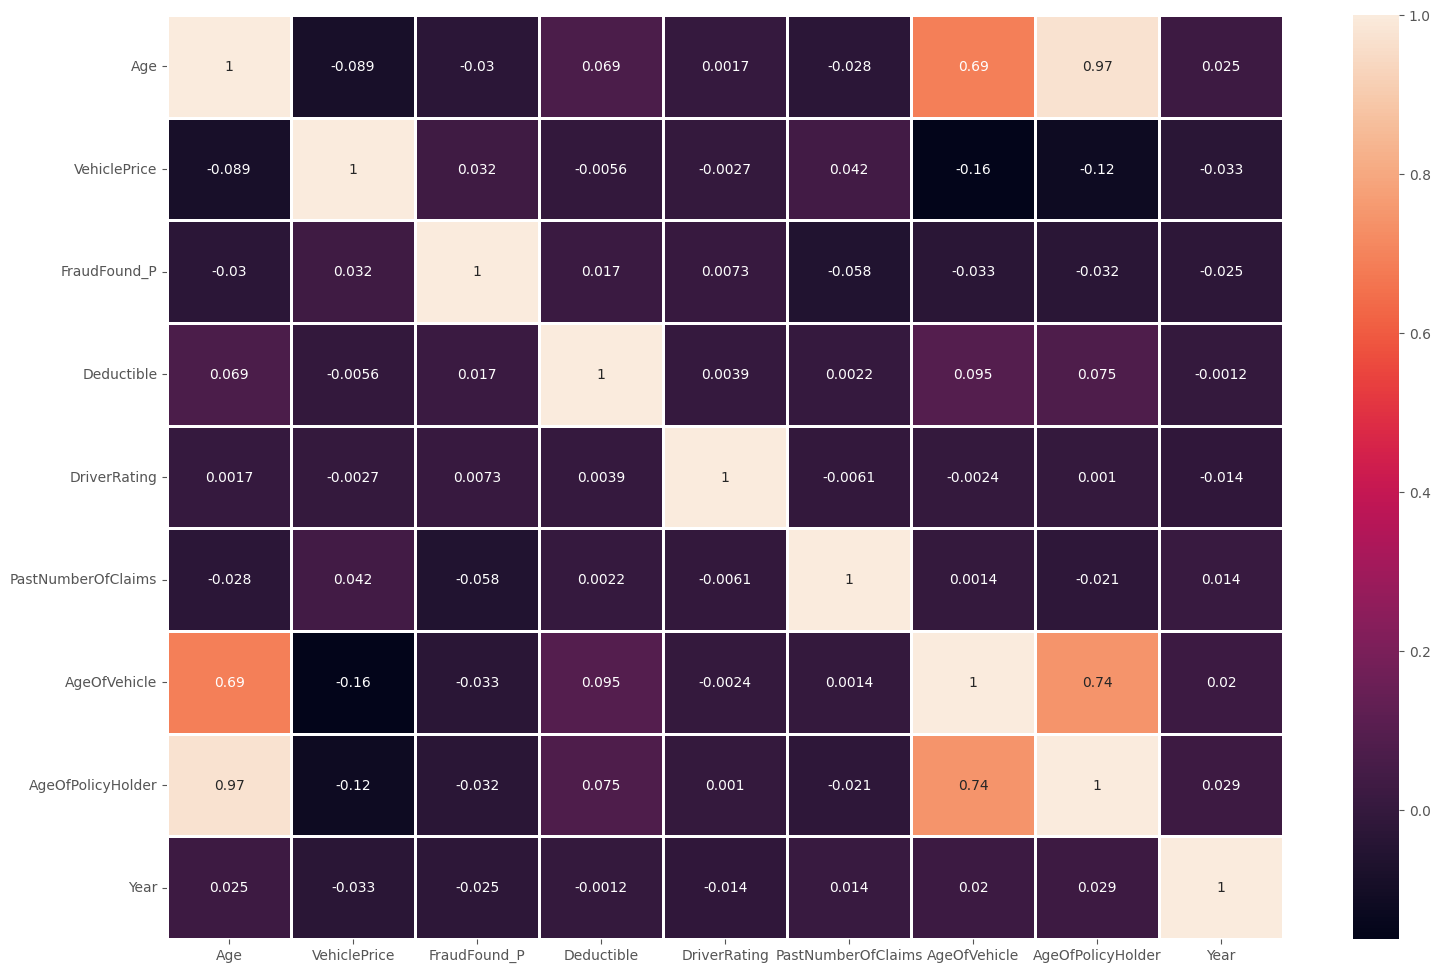

In [22]:
plt.figure(figsize = (18, 12))

corr = fraud_oracle.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()